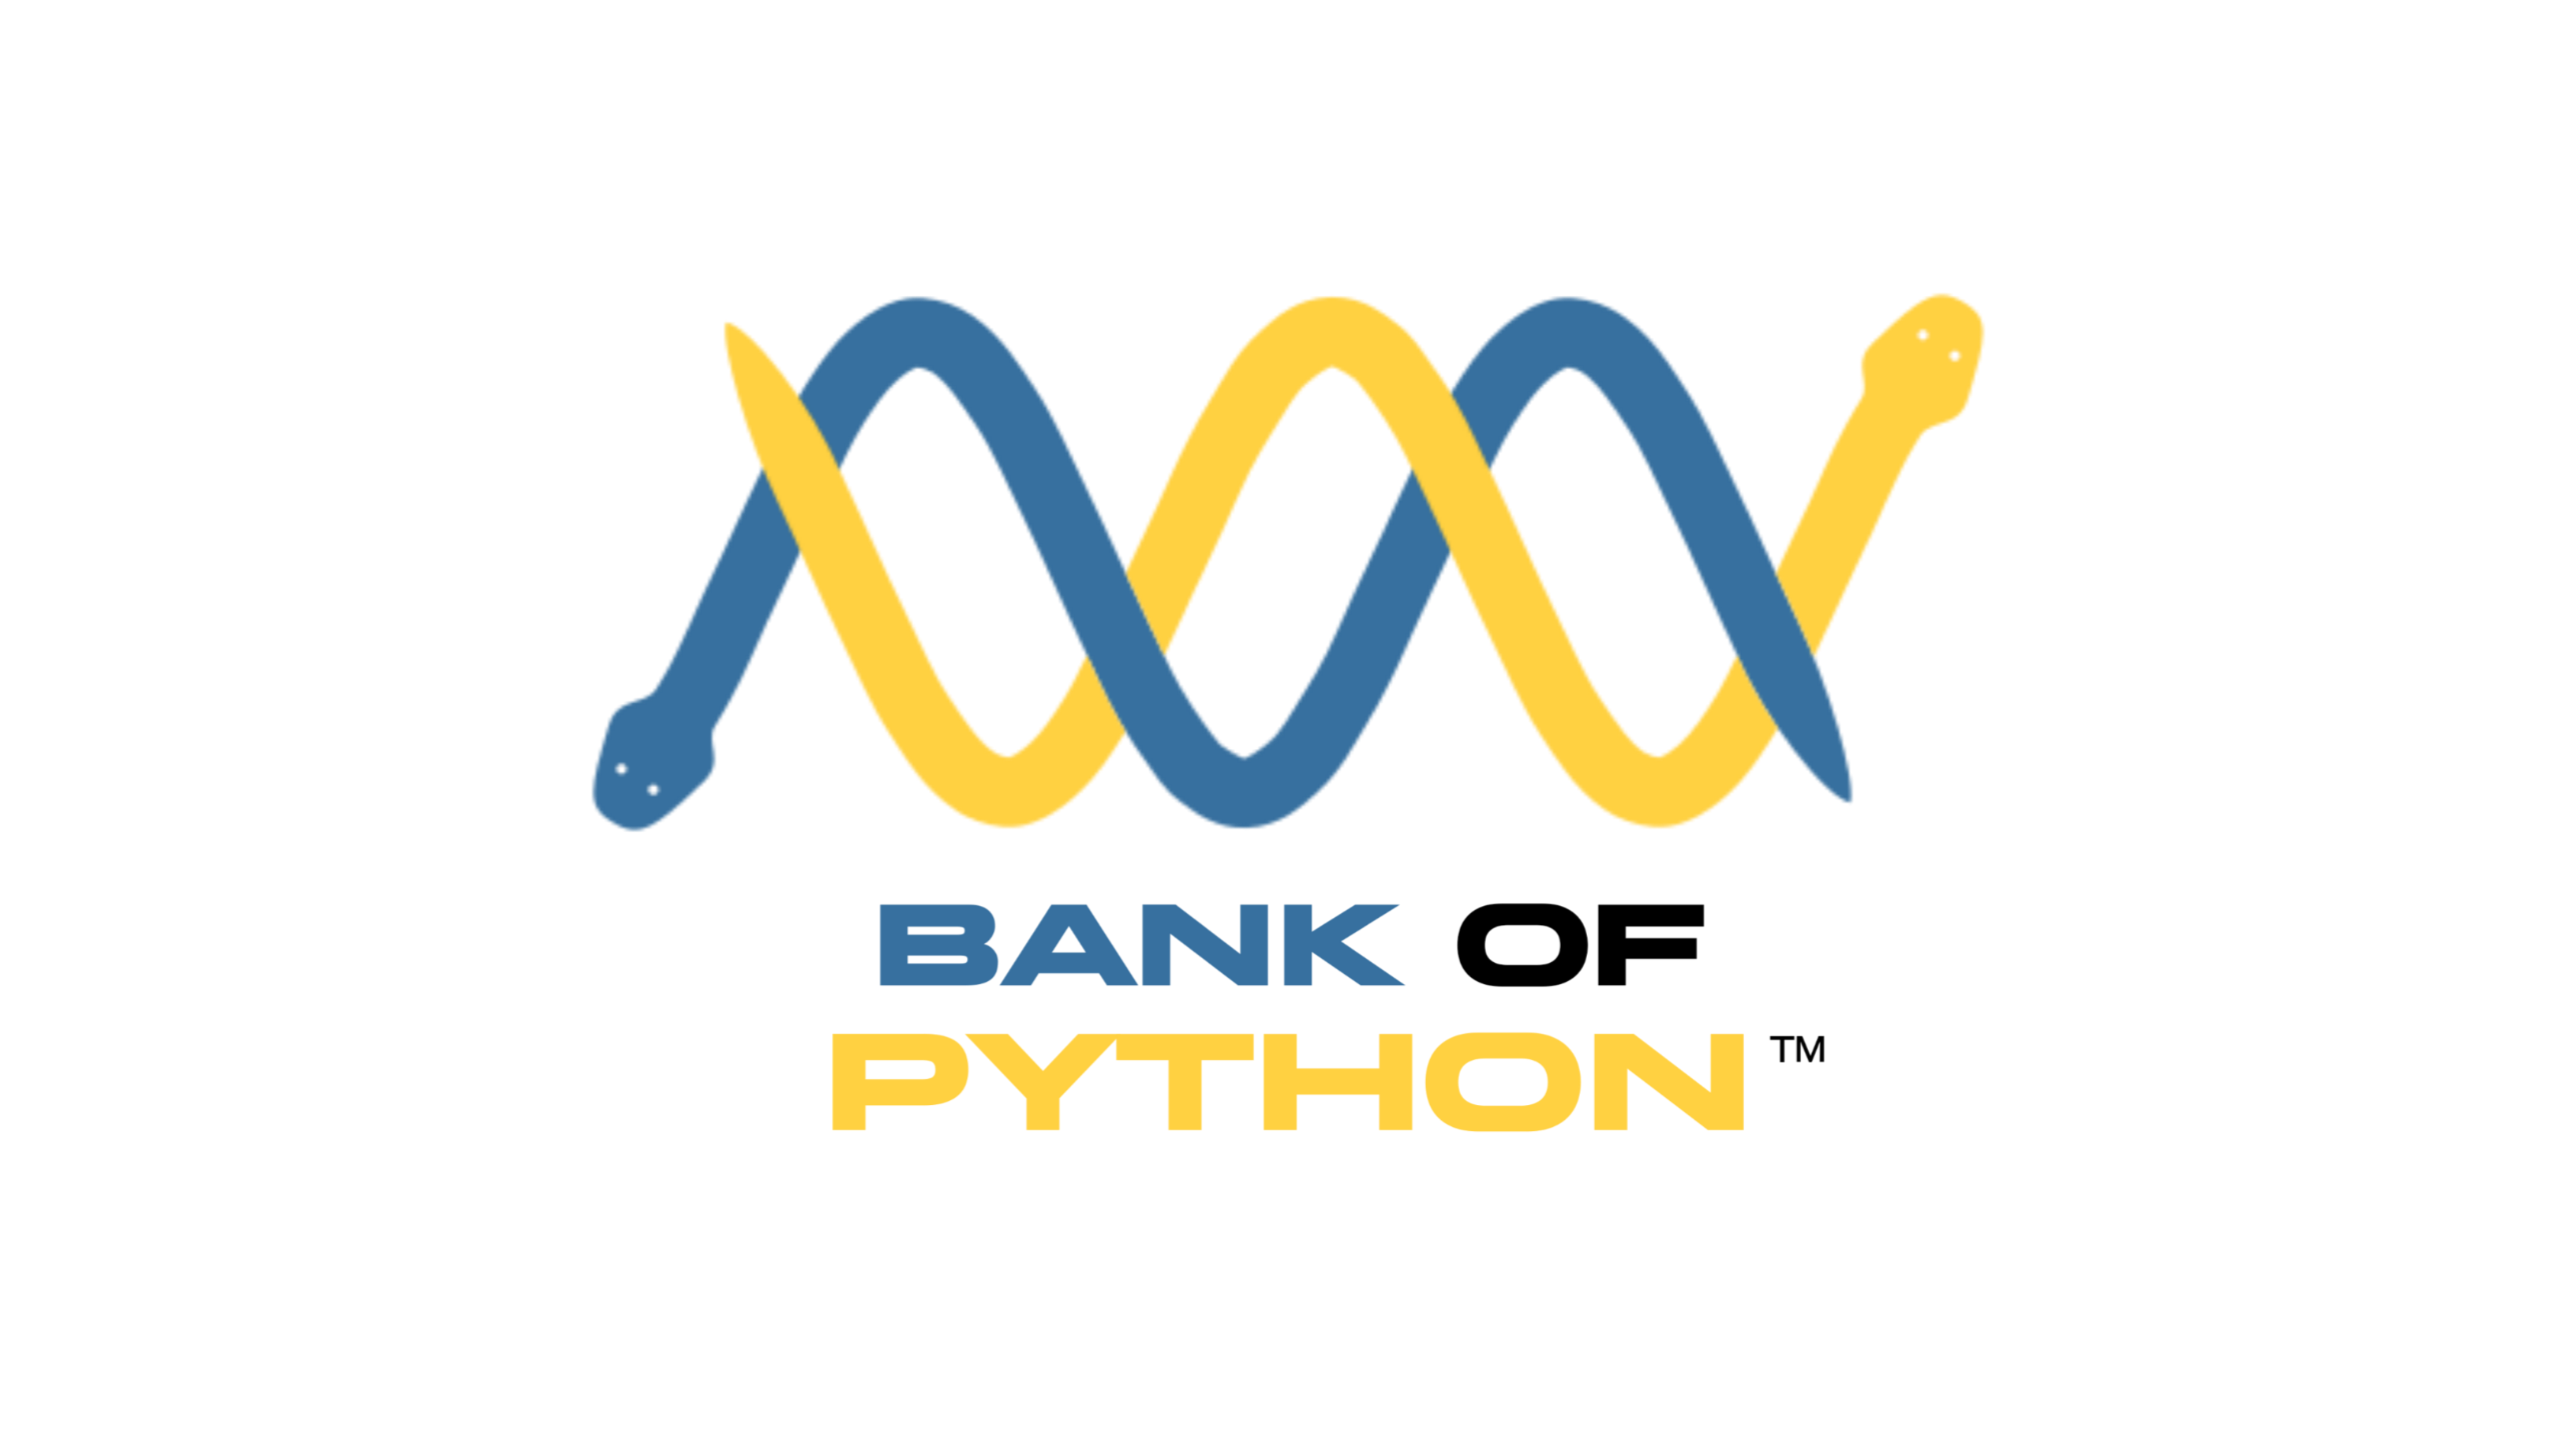

***Final Capstone Project - Suggested Walkthrough:***

_This is a suggested method for handling one of the Final Capstone Projects. We start by coding out the strictest requirements, and then build out from a working baseline model. Feel free to adapt this solution, and add features you think could help. Good luck!_

***Bank Account Manager***

_Under the Classes section in the list of suggested final capstone projects is a Bank Account Manager program. The goal is to create a class called Account which will be an abstract class for three other classes called CheckingAccount, SavingsAccount and BusinessAccount. Then you should manage credits and debits from these accounts through an ATM style program._

***Project Scope***

_To tackle this project, first consider what has to happen._

_1. There will be three different types of bank account (Checking, Savings, Business)_

_2. Each account will accept deposits and withdrawals, and will need to report balances_

***Project Wishlist***

_We might consider additional features, like:_

- _Impose a monthly maintenance fee_
- _Waive fees for minimum combined deposit balances_
- _Each account may have additional properties unique to that account:_
- _Checking allows unlimited transactions, and may keep track of printed checks_
- _Savings limits the number of withdrawals per period, and may earn interest_
- _Business may impose transaction fees_
- _Automatically transfer the "change" for debit card purchases from Checking to Savings, <br>where "change" is the amount needed to raise a debit to the nearest whole dollar_
- _Permit savings autodraft overdraft protection_

_`Let's get started!`_

***Step 1: Establish an abstract Account class with features shared by all accounts.***

_Note that abstract classes are never instantiated, they simply provide a base class with attributes and methods to be inherited by any derived class._

In [1]:
class Account:
    # Define an __init__ constructor method with attributes shared by all accounts:
    def __init__(self,acct_nbr,opening_deposit):
        self.acct_nbr = acct_nbr
        self.balance = opening_deposit
    
    # Define a __str__ mehthod to return a recognizable string to any print() command
    def __str__(self):
        return f'${self.balance:.2f}'
    
    # Define a universal method to accept deposits
    def deposit(self,dep_amt):
        self.balance += dep_amt

    # Define a universal method to handle withdrawals
    def withdraw(self,wd_amt):
        if self.balance >= wd_amt:
            self.balance -= wd_amt
        else:
            return 'Funds Unavailable'

***Step 2: Establish a Checking Account class that inherits from Account, and adds Checking-specific traits.***

In [2]:
class Checking(Account):
    def __init__(self,acct_nbr,opening_deposit):
        # Run the base class __init__
        super().__init__(acct_nbr,opening_deposit)

    # Define a __str__ method that returns a string specific to Checking accounts
    def __str__(self):
        return f'Checking Account #{self.acct_nbr}\n  Balance: {Account.__str__(self)}'

***Step 3: TEST setting up a Checking Account object***

In [3]:
x = Checking(54321,654.33)

In [4]:
print(x)

Checking Account #54321
  Balance: $654.33


In [5]:
x.withdraw(1000)

'Funds Unavailable'

In [6]:
x.withdraw(30)

In [7]:
x.balance

624.33

***Step 4: Set up similar Savings and Business account classes***

In [8]:
class Savings(Account):
    def __init__(self,acct_nbr,opening_deposit):
        # Run the base class __init__
        super().__init__(acct_nbr,opening_deposit)

    # Define a __str__ method that returns a string specific to Savings accounts
    def __str__(self):
        return f'Savings Account #{self.acct_nbr}\n  Balance: {Account.__str__(self)}'


class Business(Account):
    def __init__(self,acct_nbr,opening_deposit):
        # Run the base class __init__
        super().__init__(acct_nbr,opening_deposit)

    # Define a __str__ method that returns a string specific to Business accounts
    def __str__(self):
        return f'Business Account #{self.acct_nbr}\n  Balance: {Account.__str__(self)}'

_**At this point** we've met the minimum requirement for the assignment. We have three different bank account classes. Each one can accept deposits, make withdrawals and report a balance, as they each inherit from an abstract Account base class._

_So now the fun part - let's add some features!_

***Step 5: Create a Customer class***

_For this next phase, let's set up a Customer class that holds a customer's name and PIN and can contain any number and/or combination of Account objects._

In [9]:
class Customer:
    def __init__(self, name, PIN):
        self.name = name
        self.PIN = PIN
        
        # Create a dictionary of accounts, with lists to hold multiple accounts
        self.accts = {'C':[],'S':[],'B':[]}
        
    def __str__(self):
        return self.name
        
    def open_checking(self,acct_nbr,opening_deposit):
        self.accts['C'].append(Checking(acct_nbr,opening_deposit))
    
    def open_savings(self,acct_nbr,opening_deposit):
        self.accts['S'].append(Savings(acct_nbr,opening_deposit))
        
    def open_business(self,acct_nbr,opening_deposit):
        self.accts['B'].append(Business(acct_nbr,opening_deposit))
    
    # rather than maintain a running total of deposit balances,
    # write a method that computes a total as needed
    def get_total_deposits(self):
        total = 0
        for acct in self.accts['C']:
            print(acct)
            total += acct.balance
        for acct in self.accts['S']:
            print(acct)
            total += acct.balance
        for acct in self.accts['B']:
            print(acct)
            total += acct.balance
        print(f'Combined Deposits: ${total}')

***Step 6: TEST setting up a Customer, adding accounts, and checking balances***

In [10]:
mark = Customer('Mark',1)

In [11]:
mark.open_checking(321,555.55)

In [12]:
mark.get_total_deposits()

Checking Account #321
  Balance: $555.55
Combined Deposits: $555.55


In [13]:
mark.open_savings(564,444.66)

In [14]:
mark.get_total_deposits()

Checking Account #321
  Balance: $555.55
Savings Account #564
  Balance: $444.66
Combined Deposits: $1000.21


In [15]:
elon = Customer('Elon',2)

In [16]:
elon.open_business(2021,8900)

In [17]:
elon.get_total_deposits()

Business Account #2021
  Balance: $8900.00
Combined Deposits: $8900


_**Wait!** Why don't Nancy's combined deposits show a decimal? <br>This is easily fixed in the class definition (mostly copied from above, with a change made to the last line of code):_

In [18]:
class Customer:
    def __init__(self, name, PIN):
        self.name = name
        self.PIN = PIN
        self.accts = {'C':[],'S':[],'B':[]}

    def __str__(self):
        return self.name
        
    def open_checking(self,acct_nbr,opening_deposit):
        self.accts['C'].append(Checking(acct_nbr,opening_deposit))
    
    def open_savings(self,acct_nbr,opening_deposit):
        self.accts['S'].append(Savings(acct_nbr,opening_deposit))
        
    def open_business(self,acct_nbr,opening_deposit):
        self.accts['B'].append(Business(acct_nbr,opening_deposit))
        
    def get_total_deposits(self):
        total = 0
        for acct in self.accts['C']:
            print(acct)
            total += acct.balance
        for acct in self.accts['S']:
            print(acct)
            total += acct.balance
        for acct in self.accts['B']:
            print(acct)
            total += acct.balance
        print(f'Combined Deposits: ${total:.2f}') # added precision formatting here

_`So it's fixed, right?`_

In [19]:
elon.get_total_deposits()

Business Account #2021
  Balance: $8900.00
Combined Deposits: $8900


_**Nope!** Changes made to the class definition do *not* affect objects created under different sets of instructions.<br>To fix Nancy's account, we have to build her record from scratch._

In [20]:
elon = Customer('Elon',2)
elon.open_business(2021,8900)
elon.get_total_deposits()

Business Account #2021
  Balance: $8900.00
Combined Deposits: $8900.00


_`This is why testing is so important!`_

***Step 7: Let's write some functions for making deposits and withdrawals.***

_Be sure to include a docstring that explains what's expected by the function!_

In [21]:
def make_dep(cust,acct_type,acct_num,dep_amt):
    """
    make_dep(cust, acct_type, acct_num, dep_amt)
    cust      = variable name (Customer record/ID)
    acct_type = string 'C' 'S' or 'B'
    acct_num  = integer
    dep_amt   = integer
    """
    for acct in cust.accts[acct_type]:
        if acct.acct_nbr == acct_num:
            acct.deposit(dep_amt)

In [22]:
make_dep(elon,'B',2021,67.45)

In [23]:
elon.get_total_deposits()

Business Account #2021
  Balance: $8967.45
Combined Deposits: $8967.45


In [24]:
def make_wd(cust,acct_type,acct_num,wd_amt):
    """
    make_dep(cust, acct_type, acct_num, wd_amt)
    cust      = variable name (Customer record/ID)
    acct_type = string 'C' 'S' or 'B'
    acct_num  = integer
    wd_amt    = integer
    """
    for acct in cust.accts[acct_type]:
        if acct.acct_nbr == acct_num:
            acct.withdraw(wd_amt)

In [25]:
make_wd(elon,'B',2021,1000000)

In [26]:
elon.get_total_deposits()

Business Account #2021
  Balance: $8967.45
Combined Deposits: $8967.45


_**What happened??**  We seemed to successfully make a withdrawal, but nothing changed!<br>This is because, at the very beginning, we had our Account class *return* the string 'Funds Unavailable' instead of print it. If we change that here, we'll have to also run the derived class definitions, and Nancy's creation, but *not* the Customer class definition. Watch:_

In [27]:
class Account:
    def __init__(self,acct_nbr,opening_deposit):
        self.acct_nbr = acct_nbr
        self.balance = opening_deposit
        
    def __str__(self):
        return f'${self.balance:.2f}'
    
    def deposit(self,dep_amt):
        self.balance += dep_amt
        
    def withdraw(self,wd_amt):
        if self.balance >= wd_amt:
            self.balance -= wd_amt
        else:
            print('Funds Unavailable')  # changed "return" to "print"

In [28]:
class Checking(Account):
    def __init__(self,acct_nbr,opening_deposit):
        super().__init__(acct_nbr,opening_deposit)
    
    def __str__(self):
        return f'Checking Account #{self.acct_nbr}\n  Balance: {Account.__str__(self)}'

    
class Savings(Account):
    def __init__(self,acct_nbr,opening_deposit):
        super().__init__(acct_nbr,opening_deposit)

    def __str__(self):
        return f'Savings Account #{self.acct_nbr}\n  Balance: {Account.__str__(self)}'


class Business(Account):
    def __init__(self,acct_nbr,opening_deposit):
        super().__init__(acct_nbr,opening_deposit)

    def __str__(self):
        return f'Business Account #{self.acct_nbr}\n  Balance: {Account.__str__(self)}'

In [29]:
nancy = Customer('Elon',2)
nancy.open_business(2021,8900)
nancy.get_total_deposits()

Business Account #2021
  Balance: $8900.00
Combined Deposits: $8900.00


In [30]:
make_wd(elon,'B',2021,1000000)

In [31]:
nancy.get_total_deposits()

Business Account #2021
  Balance: $8900.00
Combined Deposits: $8900.00


***Thank You***

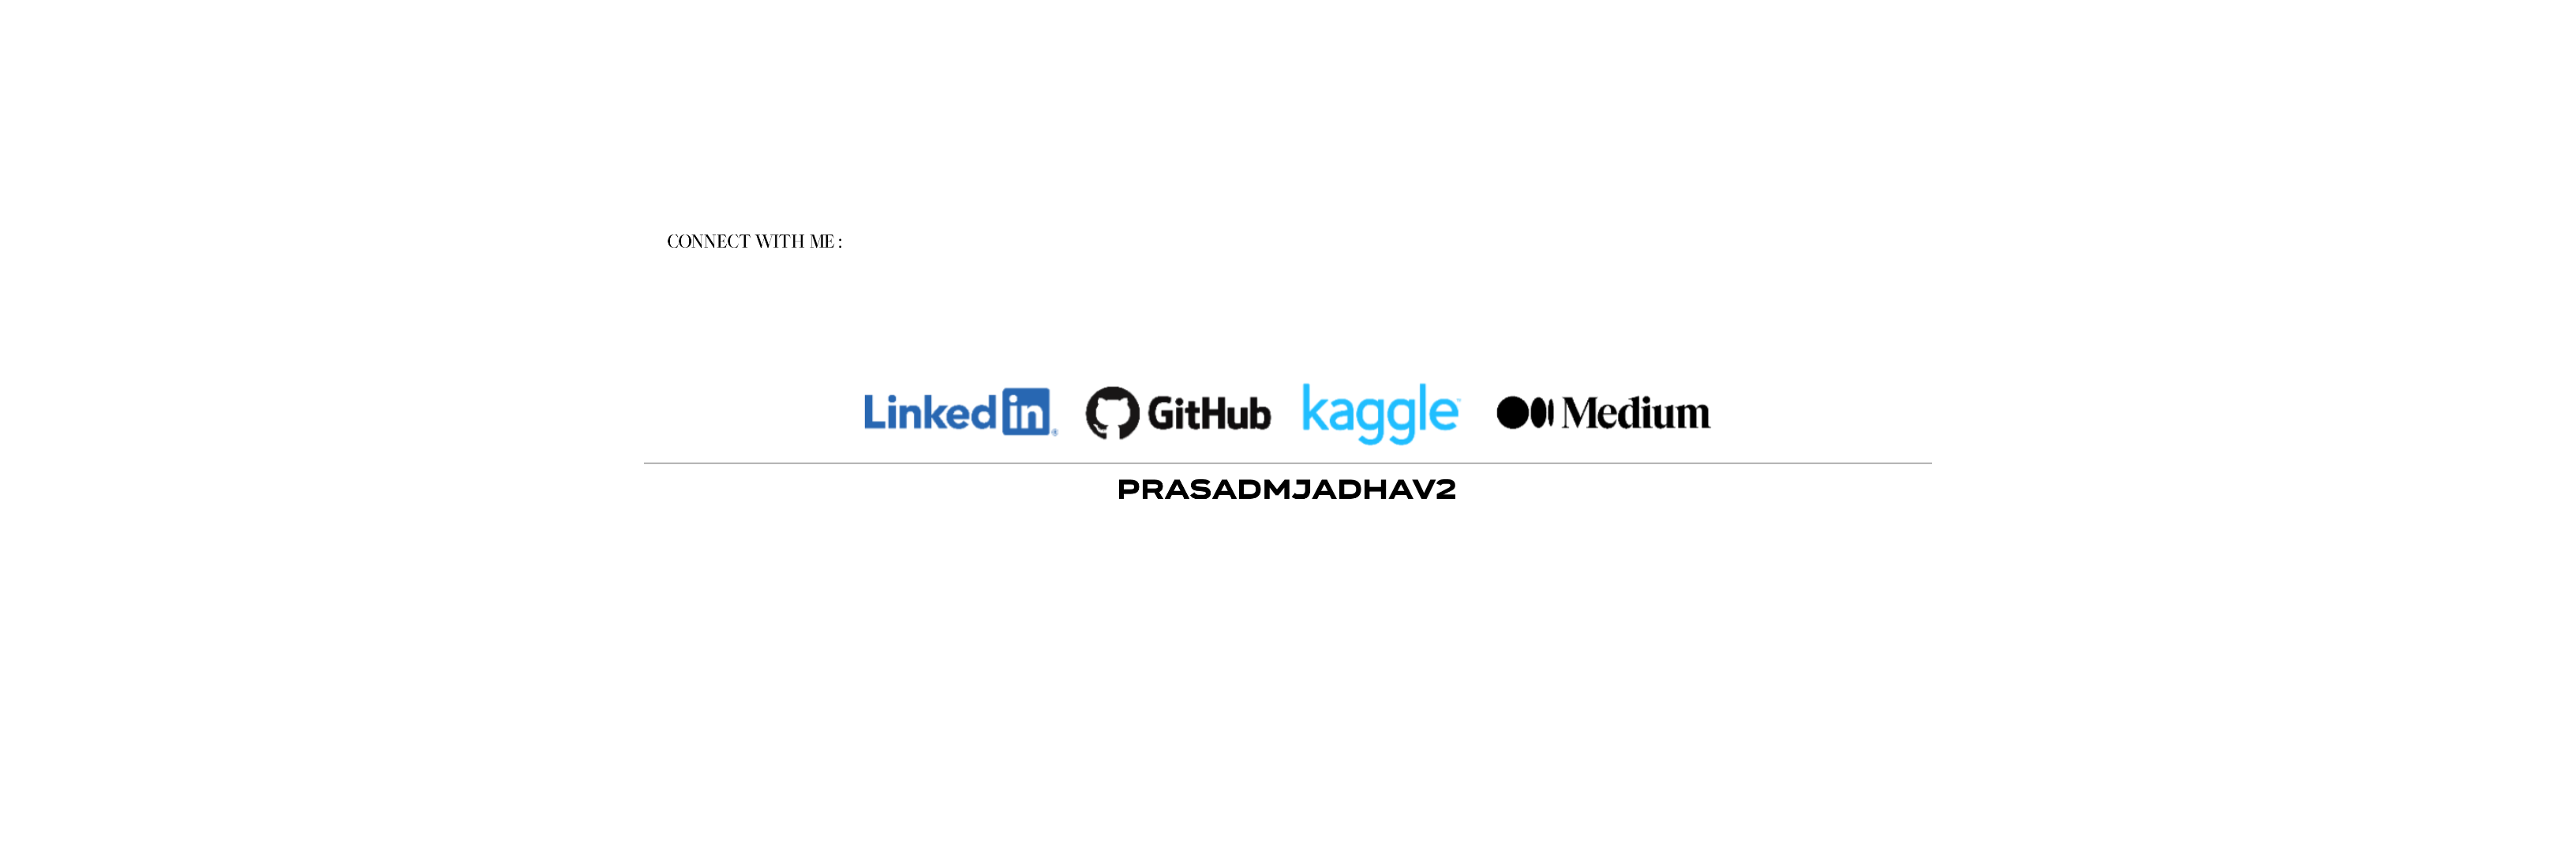